In [2]:
pip install easyocr

     |████████████████████████████████| 57.2MB 61kB/s 


In [3]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8, 16

In [4]:
reader = easyocr.Reader(['en'])

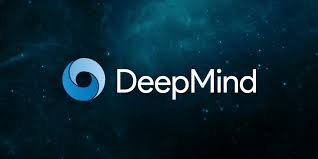

In [5]:
Image("/content/drive/MyDrive/started/Kaggle/deepmind.jpg")

In [6]:
insight = reader.readtext('/content/drive/MyDrive/started/Kaggle/deepmind.jpg')

In [17]:
insight

[([[111, 63], [263, 63], [263, 105], [111, 105]],
  'DeepMind',
  0.9773439764976501)]

In [18]:
print(f"so the text in the diplayed image is  --> {insight[0][1]}")

so the text in the diplayed image is  --> DeepMind


In [10]:
cord = insight[-1][0]

In [11]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [12]:
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

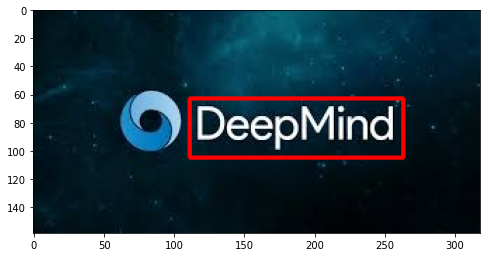

In [13]:
image = cv2.imread('/content/drive/MyDrive/started/Kaggle/deepmind.jpg')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [20]:
 !pip install keras-ocr

     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 9.5MB 9.1MB/s 
     |████████████████████████████████| 829kB 47.7MB/s 
     |████████████████████████████████| 133kB 54.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.6-cp36-none-any.whl size=42938 sha256=d8891545126cb7e4c35c40e4788d0655e16e54d9ba30fe334c05e8f5fc92c908
  Stored in directory: /root/.cache/pip/wheels/79/59/e6/79dd15333b911d51ea68d7e4c325e14f042eacc141201dca44
Successfully built keras-ocr


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(3,)


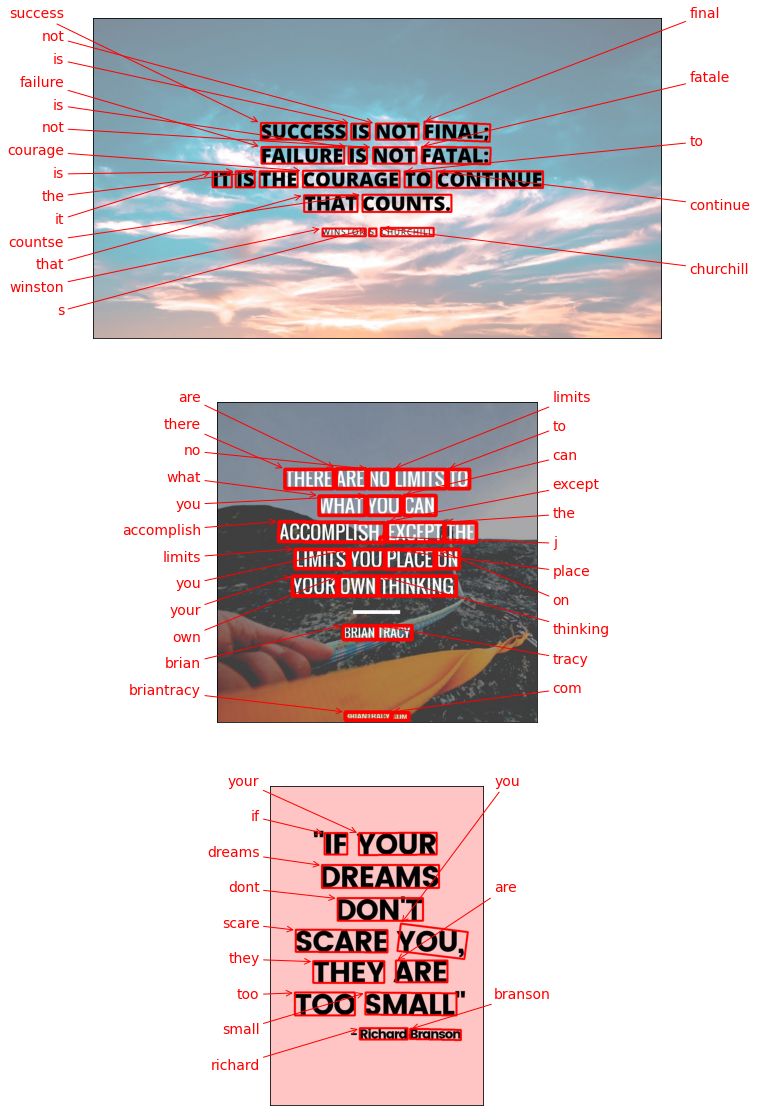

In [22]:
import keras_ocr
from matplotlib import pyplot as plt

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# List of three example images
images = [keras_ocr.tools.read(img) for img in ['/content/drive/MyDrive/ocr/Fearless_Motivational_Quote_Desktop_Wallpaper_1.jpg',
                                               '/content/drive/MyDrive/ocr/brian-tracy-inspirational-quote.jpg',
                                                '/content/drive/MyDrive/ocr/c998ea1d120959472a3a28cf8d821fec.jpg'
                                               ]
]

#Print shape...
import numpy as np
print(np.shape(images))

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)